# CLUSTERING CUSTOMER

## Data Preparation

In [1]:
#Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import Data
data = pd.read_csv("Clustering_Customer.csv")
data.head()

,user_id,jumlah_transaksi,biaya,age
0,1,8,352.960001,30
1,3,2,32.990000,48
2,4,2,141.789997,16
3,5,4,212.439999,14
4,6,1,64.900002,13


## 1. Descriptive Statistics
Ringkasan memeberi kita gambaran keadaan Data 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79986 entries, 0 to 79985
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           79986 non-null  int64  
 1   jumlah_transaksi  79986 non-null  int64  
 2   biaya             79986 non-null  float64
 3   age               79986 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.4 MB


### Informasi
1. Jumlah row 79986, Jumlah columns 4 

2. Type data sudah Sesuai dengan nama

3. Data Null values tidak ada

In [3]:
data.describe()

,user_id,jumlah_transaksi,biaya,age
count,79986.000000,79986.000000,79986.000000,79986.000000
mean,50010.011677,2.256745,134.953048,41.076151
std,28839.965244,1.598749,137.853786,16.994163
min,1.000000,1.000000,0.490000,12.000000
25%,25055.250000,1.000000,41.752500,26.000000
50%,49995.500000,2.000000,89.599998,41.000000
75%,74990.500000,3.000000,182.092500,56.000000
max,100000.000000,13.000000,1860.949997,70.000000


## 2. Univariate Analysis
menganalisa setiap Kolom, Melihat Distribusi Secara Detail

### 2.1 Individual Boxplot(Numeric)

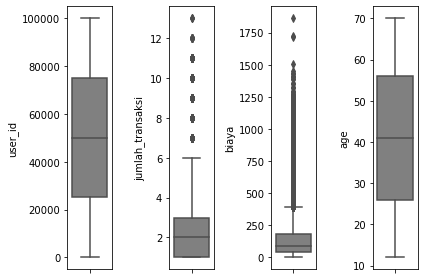

In [4]:
variabel = ['user_id', 'jumlah_transaksi', 'biaya', 'age']
for i in range(0, len(variabel)):
    plt.subplot(1, len(variabel), i+1)
    sns.boxplot(y=data[variabel[i]] ,color='gray', orient='v')
    plt.tight_layout()

### INFORMASI
Pada jumlah Transaksi dan biaya  outlier sangat banyak di kolom Jumlah_transaksi

dan biaya untuk memudahkan pemodelan maka kita buang sementara data yang outlier

In [5]:
print(f'Jumlah baris sebelum Filter Outlier= {len(data)}')

filter_outlier = np.array([True] * len(data))
for variabel in ['jumlah_transaksi', 'biaya']:
    Q1 = data[variabel].quantile(0.25)
    Q3 = data[variabel].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    high = Q3 + (1.5 * IQR)
    
    filter_outlier = ((data[variabel] > low) & (data[variabel] < high)) & filter_outlier
    
data_bersih =  data[filter_outlier]
print(f'Jumlah baris setelah Filter Outlier ={len(data_bersih)}')
print(f'Jumlah baris yang dibuang ={len(data)-len(data_bersih)}')
print(f'Persentase baris yang dibuang ={(len(data)-len(data_bersih))/len(data)*100}%')

Jumlah baris sebelum Filter Outlier= 79986
Jumlah baris setelah Filter Outlier =73571
Jumlah baris yang dibuang =6415
Persentase baris yang dibuang =8.020153526867201%


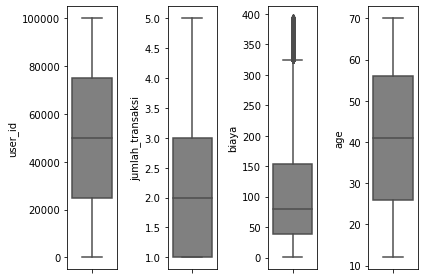

In [6]:
variabel = ['user_id', 'jumlah_transaksi', 'biaya', 'age']
for i in range(0, len(variabel)):
    plt.subplot(1, len(variabel), i+1)
    sns.boxplot(y=data_bersih[variabel[i]] ,color='gray', orient='v')
    plt.tight_layout()

In [7]:
data_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73571 entries, 1 to 79985
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           73571 non-null  int64  
 1   jumlah_transaksi  73571 non-null  int64  
 2   biaya             73571 non-null  float64
 3   age               73571 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 MB


### Informasi
Setelah membuang outlier data berkurang menjadi 73571

## 3. Bivariate Analysis
Bivariate Analysis adalah melihat Hubungan antar Kolom

namun saya akan mengeluarkan Kolom User_id karena tidak ada

hubungannya dengan KOlom yang lain karena User_id hanya mewakili

orang dan mengganti nama dataset dari data_bersih menjadi data.

In [8]:
data_bersih = data_bersih.drop(columns=['user_id'])

In [9]:
#Correlation Estimate
data_bersih.corr()

,jumlah_transaksi,biaya,age
jumlah_transaksi,1.000000,0.667411,0.000811
biaya,0.667411,1.000000,0.000620
age,0.000811,0.000620,1.000000


<AxesSubplot:>

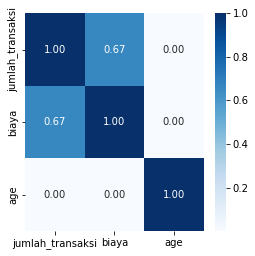

In [10]:
plt.figure(figsize = (4, 4))
sns.heatmap(data_bersih.corr(), cmap='Blues', annot=True, fmt='.2f')

#### INFORMASI
Pada gambar diatas dapat disimpulkan
1. Jumlah transaksi dan biaya memiliki korelasi 0.67
semakin sering transaksi maka uang yang dihabiskan lebih besar
2. Usia  tidak memiliki korelasi dengan jumlah transaksi

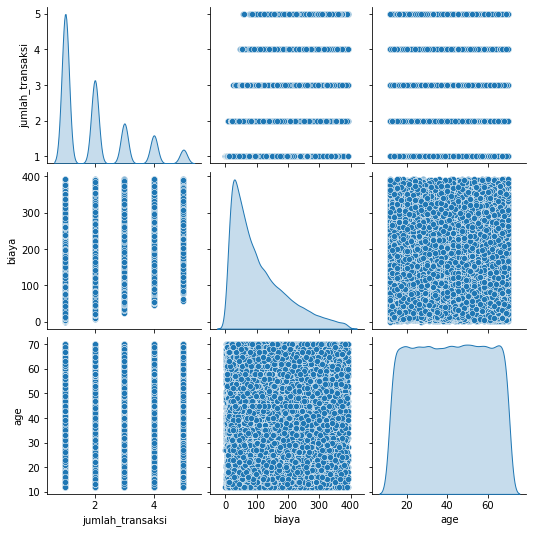

In [11]:
sns.pairplot(data_bersih, diag_kind = 'kde')

## 4.Standarisasi data dengan StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data_bersih.astype(float))
data_std

array([[ 0.03307424, -0.85397174,  0.40811383],
       [ 0.03307424,  0.40928462, -1.47459256],
       [ 1.75333213,  1.22958854, -1.59226171],
       ...,
       [-0.82705471, -0.72613669,  1.29063245],
       [-0.82705471, -0.36620151,  0.11394096],
       [ 0.03307424,  0.15477564,  1.4083016 ]])

In [13]:
data_std = pd.DataFrame(data=data_std, columns=list(data_bersih))
data_std.head()

,jumlah_transaksi,biaya,age
0,0.033074,-0.853972,0.408114
1,0.033074,0.409285,-1.474593
2,1.753332,1.229589,-1.592262
3,-0.827055,-0.483471,-1.651096
4,-0.827055,-0.381179,1.231798


In [14]:
data_std.describe()

,jumlah_transaksi,biaya,age
count,7.357100e+04,7.357100e+04,7.357100e+04
mean,-2.325160e-15,6.427156e-17,-6.475333e-17
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-8.270547e-01,-1.231323e+00,-1.709931e+00
25%,-8.270547e-01,-7.841908e-01,-8.862468e-01
50%,3.307424e-02,-3.087280e-01,-3.728192e-03
75%,8.932032e-01,5.444345e-01,8.787904e-01
max,2.613461e+00,3.321160e+00,1.702474e+00


#### INFORMASI
Setelah melakukan StandardScaler dari library sklearn.preprocessing

dari describe diatas standart deviasi mendekati 1

maka data sudah terdistribusi normal

## 1.Mencari Nilai pembagian Clustering dengan Elbow 

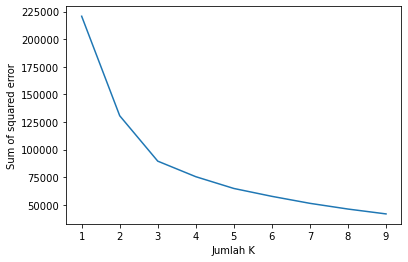

In [27]:
#Import Library 
#Membuat variabel menampung Inersia(sse)
# Inersia adalah Jumlah kuadrat jarak sampel ke pusat cluster/Sum of squared error
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data_std)
    sse.append(km.inertia_)
plt.xlabel('Jumlah K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Informasi
untuk memperoleh nilai kluster yang optimal dipilih nilai K

dimana kurva mulai bengkok dan melandai yaitu di K=3

## 2. Mengelompokkan Kluster pada data bersih

In [24]:
data_bersih.head()

,jumlah_transaksi,biaya,age
1,2,32.990000,48
2,2,141.789997,16
3,4,212.439999,14
4,1,64.900002,13
5,1,73.709999,62


In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_std)
df_data_std = pd.DataFrame(data=data_std, columns=list(data_bersih))

In [25]:
df_data_std['Clusters'] = kmeans.labels_
data_bersih['Clusters'] = kmeans.labels_

In [26]:
data_bersih.head()

,jumlah_transaksi,biaya,age,Clusters
1,2,32.990000,48,1
2,2,141.789997,16,0
3,4,212.439999,14,2
4,1,64.900002,13,0
5,1,73.709999,62,1


## 3. Visualisasi data pembagian Cluster

<AxesSubplot:xlabel='age', ylabel='biaya'>

D:\Anacondaa\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


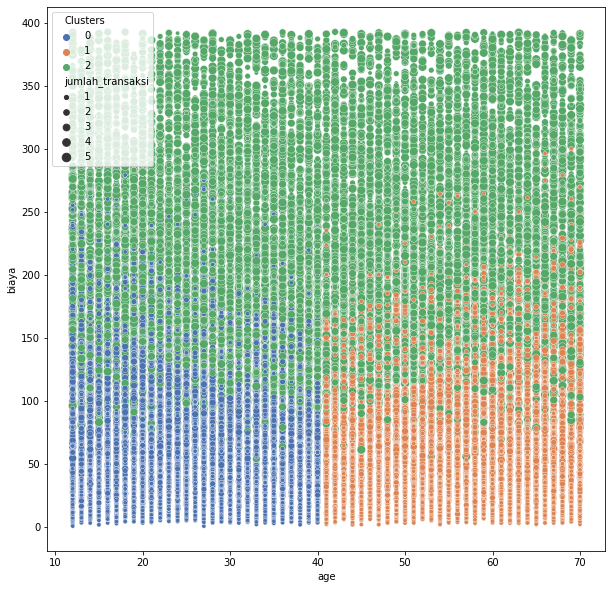

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="age", y="biaya", 
                size="jumlah_transaksi",
                hue="Clusters", 
                palette="deep", data=data_bersih)

## 4.Interpretasi Hasil

In [31]:
#Melihat statistik setiap Clusters
display(data_bersih.groupby('Clusters').agg(['mean','median']))

jumlah_transaksi              biaya                    age       
                     mean median        mean      median       mean median
Clusters                                                                  
0                1.441278    1.0   69.141599   57.265000  25.718798   26.0
1                1.440474    1.0   68.795628   57.360002  55.771661   56.0
2                3.552138    4.0  221.323827  214.310001  41.121748   41.0